## Titanic EDA
박지훈

### 패키지 로드

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### 데이터 로드

In [2]:
test = pd.read_csv("./data/test.csv")
train = pd.read_csv("./data/train.csv")

In [39]:
with open("./data/test.csv") as f:
    a = f.readlines()
    
with open("./data/train.csv") as f:
    b = f.readlines()

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary

|Variable|Definition|Key|
|--------|----------|---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex|-|
|Age|Age in years|-|
|sibsp|# of siblings / spouses aboard the Titanic|-|
|parch|# of parents / children aboard the Titanic|-|
|ticket|Ticket number|-|
|fare|Passenger fare|-|
|cabin|Cabin number|-|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

In [109]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### EDA

우선 시작

In [5]:
plt.style.use("ggplot")

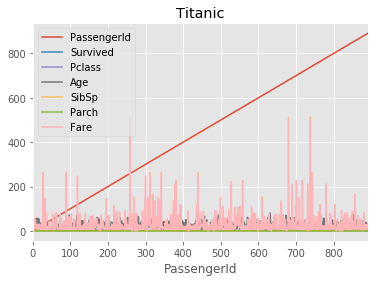

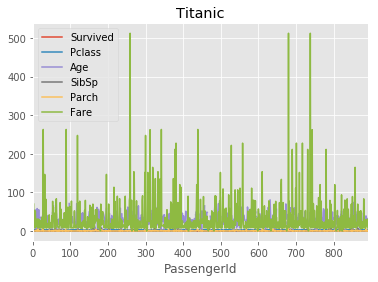

In [6]:
train.plot(x = train["PassengerId"], title = "Titanic")
train.iloc[:, 1:].plot(x = train["PassengerId"], title = "Titanic")
plt.show()

---

Q) 각 변수의 대략적인 분포는?

C:\Users\SNB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


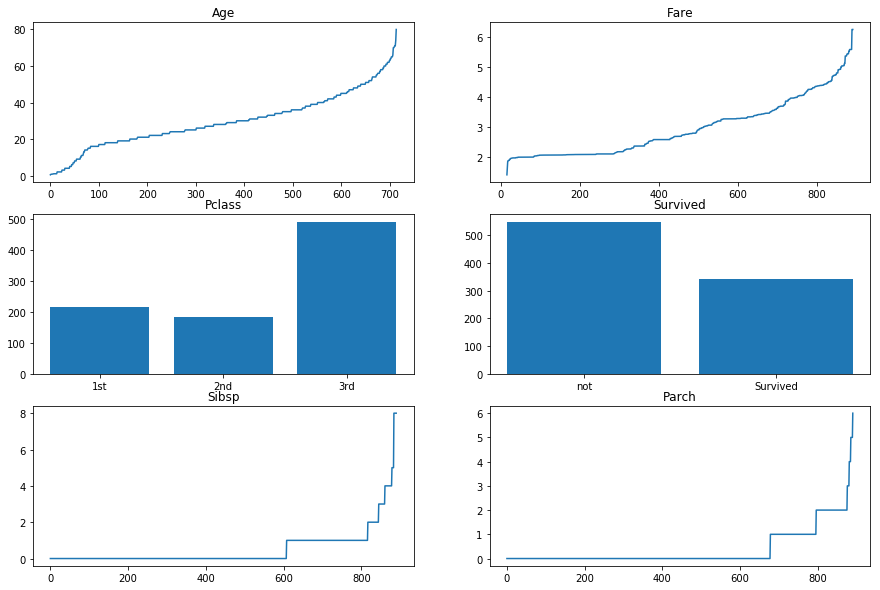

In [55]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.title("Age")
plt.plot(np.sort(train.Age))

plt.subplot(3, 2, 2)
plt.title("Fare")
plt.plot(np.sort(np.log(train.Fare))) #로그

plt.subplot(3, 2, 3)
plt.title("Pclass")
temp = train.groupby(by="Pclass").count().PassengerId
plt.bar([1, 2, 3], (temp.iloc[0], temp.iloc[1], temp.iloc[2]))
plt.xticks([1, 2, 3], ("1st", "2nd", "3rd"))

plt.subplot(3, 2, 4)
plt.title("Survived")
plt.bar([0, 1], (train.groupby(by="Survived").count().iloc[0, :1][0], train.groupby(by="Survived").count().iloc[1, :1][0]))
plt.xticks([0, 1], ("not", "Survived"))

plt.subplot(3, 2, 5)
plt.title("Sibsp")
plt.plot(np.sort(train.SibSp))

plt.subplot(3, 2, 6)
plt.title("Parch")
plt.plot(np.sort(train.Parch))
plt.show()

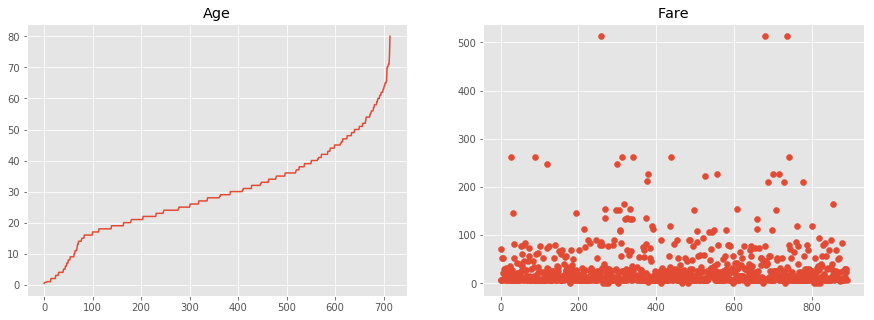

In [253]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Age")
plt.plot(np.sort(train.Age))
plt.subplot(1, 2, 2)
plt.title("Fare")
plt.scatter(x = train.sort_values("Age").index, y =  train.sort_values("Age").Fare)
plt.show()

교호작용, 구조방정식
순위자료를 가지고 많이 사용함 왜냐하면 모형을 강건하게 볼수 있기 때문
최대한 정규분포형태로

---

Q) 호칭에 따른 구분이 있지 않을까?

In [ ]:
# train["call"] = train.Name.str.extract(", (.+)?\.", expand=False) #not working, do not run it!

In [37]:
train["call"] = train.Name.str.extract(", (.+?)\.", expand=False)

In [38]:
train.call.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,call
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [51]:
train.groupby(by=["call", "Parch"]).mean()

PassengerId  Survived    Pclass        Age     SibSp  \
call         Parch                                                         
Capt         1       746.000000  0.000000  1.000000  70.000000  1.000000   
Col          0       671.500000  0.500000  1.000000  58.000000  0.000000   
Don          0        31.000000  0.000000  1.000000  40.000000  0.000000   
Dr           0       545.857143  0.428571  1.285714  42.000000  0.571429   
Jonkheer     0       823.000000  0.000000  1.000000  38.000000  0.000000   
Lady         0       557.000000  1.000000  1.000000  48.000000  1.000000   
Major        0       493.500000  0.500000  1.000000  48.500000  0.000000   
Master       0       126.000000  1.000000  3.000000  12.000000  1.000000   
             1       425.565217  0.608696  2.695652   3.696000  2.043478   
             2       417.812500  0.500000  2.500000   5.250000  2.750000   
Miss         0       388.915254  0.737288  2.313559  27.763736  0.169492   
             1       489.500000  0.714286  2.392857   9.895833  1.107143   
             2       411.638889  0.555556  2.222222  13.387097  2.194444   
Mlle         0       676.500000  1.000000  1.000000  24.000000  0.000000   
Mme          0       370.000000  1.000000  1.000000  24.000000  0.000000   
Mr           0       461.711828  0.159140  2.445161  32.204286  0.169892   
             1       393.787879  0.151515  2.030303  33.848485  0.878788   
             2       425.600000  0.133333  2.133333  30.454545  2.466667   
             3        87.000000  0.000000  3.000000  16.000000  1.000000   
             4       400.000000  0.000000  2.000000  52.000000  1.000000   
             5        14.000000  0.000000  3.000000  39.000000  1.000000   
Mrs          0       406.014493  0.855072  1.855072  35.472727  0.782609   
             1       524.968750  0.812500  1.906250  37.419355  0.625000   
             2       418.846154  0.769231  2.307692  31.090909  0.384615   
             3       702.250000  0.750000  2.500000  37.500000  1.000000   
             4       368.000000  0.000000  3.000000  37.000000  0.500000   
             5       540.500000  0.250000  3.000000  39.250000  0.500000   
             6       679.000000  0.000000  3.000000  43.000000  1.000000   
Ms           0       444.000000  1.000000  2.000000  28.000000  0.000000   
Rev          0       413.000000  0.000000  2.000000  46.200000  0.200000   
             1       849.000000  0.000000  2.000000  28.000000  0.000000   
Sir          0       600.000000  1.000000  1.000000  49.000000  1.000000   
the Countess 0       760.000000  1.000000  1.000000  33.000000  0.000000   

                          Fare  
call         Parch              
Capt         1       71.000000  
Col          0       31.025000  
Don          0       27.720800  
Dr           0       49.168457  
Jonkheer     0        0.000000  
Lady         0       39.600000  
Major        0       28.525000  
Master       0       11.241700  
             1       24.185687  
             2       51.288281  
Miss         0       38.028781  
             1       33.312796  
             2       70.862733  
Mlle         0       59.402100  
Mme          0       69.300000  
Mr           0       19.379263  
             1       61.827785  
             2       81.870833  
             3       34.375000  
             4      145.450000  
             5       31.275000  
Mrs          0       41.823612  
             1       58.952475  
             2       42.098069  
             3       23.845825  
             4       24.487500  
             5       32.868750  
             6       46.900000  
Ms           0       13.000000  
Rev          0       15.375000  
             1       33.000000  
Sir          0       56.929200  
the Countess 0       86.500000

In [290]:
train.groupby(by=["call"]).count().iloc[:, :1]

,PassengerId
call,
Capt,1
Col,2
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40
Miss,182


---

Q) 선실 번호로 생존여부를 유추 할 수 있지 않을까?

In [93]:
train["Cabin_A"] = train.Cabin.str.extract("([A-z]+)", expand=False)
train.Cabin_A.fillna("nan", inplace=True)

In [218]:
train.Cabin_A.unique()

array(['nan', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [167]:
data = train.Cabin.str.extractall("(\d+)")

In [193]:
data.iloc[10]

0    78
Name: (31, 0), dtype: object

In [180]:
data

0
    match     
1   0       85
3   0      123
6   0       46
10  0        6
11  0      103
21  0       56
23  0        6
27  0       23
    1       25
    2       27
31  0       78
52  0       33
54  0       30
55  0       52
61  0       28
62  0       83
66  0       33
75  0       73
88  0       23
    1       25
    2       27
92  0       31
96  0        5
97  0       10
    1       12
102 0       26
110 0      110
118 0       58
    1       60
123 0      101
...        ...
772 0       77
776 0       38
779 0        3
781 0       20
782 0        6
789 0       82
    1       84
796 0       17
802 0       96
    1       98
806 0       36
809 0        8
815 0      102
820 0       69
823 0      121
829 0       28
835 0       49
839 0       47
849 0       92
853 0       28
857 0       17
862 0       17
867 0       24
871 0       35
872 0       51
    1       53
    2       55
879 0       50
887 0       42
889 0      148

[230 rows x 1 columns]

In [175]:
train.Cabin.str.extractall("(\d+)")

0
    match     
1   0       85
3   0      123
6   0       46
10  0        6
11  0      103
21  0       56
23  0        6
27  0       23
    1       25
    2       27
31  0       78
52  0       33
54  0       30
55  0       52
61  0       28
62  0       83
66  0       33
75  0       73
88  0       23
    1       25
    2       27
92  0       31
96  0        5
97  0       10
    1       12
102 0       26
110 0      110
118 0       58
    1       60
123 0      101
...        ...
772 0       77
776 0       38
779 0        3
781 0       20
782 0        6
789 0       82
    1       84
796 0       17
802 0       96
    1       98
806 0       36
809 0        8
815 0      102
820 0       69
823 0      121
829 0       28
835 0       49
839 0       47
849 0       92
853 0       28
857 0       17
862 0       17
867 0       24
871 0       35
872 0       51
    1       53
    2       55
879 0       50
887 0       42
889 0      148

[230 rows x 1 columns]

In [206]:
train.Cabin_A.fillna("nan", inplace=True)

In [217]:
train.groupby(["Cabin_A", "Survived"]).count()

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Cabin_A Survived                                                              
A       0                   8       8     8    8    5      8      8       8   
        1                   7       7     7    7    7      7      7       7   
B       0                  12      12    12   12   11     12     12      12   
        1                  35      35    35   35   34     35     35      35   
C       0                  24      24    24   24   21     24     24      24   
        1                  35      35    35   35   30     35     35      35   
D       0                   8       8     8    8    8      8      8       8   
        1                  25      25    25   25   23     25     25      25   
E       0                   8       8     8    8    8      8      8       8   
        1                  24      24    24   24   22     24     24      24   
F       0                   5       5     5    5    4      5      5       5   
        1                   8       8     8    8    7      8      8       8   
G       0                   2       2     2    2    2      2      2       2   
        1                   2       2     2    2    2      2      2       2   
T       0                   1       1     1    1    1      1      1       1   
nan     0                 481     481   481  481  364    481    481     481   
        1                 206     206   206  206  165    206    206     206   

                  Fare  Cabin  Embarked  call  Cabin_B  
Cabin_A Survived                                        
A       0            8      8         8     8        8  
        1            7      7         7     7        7  
B       0           12     12        12    12       12  
        1           35     35        33    35       35  
C       0           24     24        24    24       24  
        1           35     35        35    35       35  
D       0            8      8         8     8        8  
        1           25     25        25    25       25  
E       0            8      8         8     8        8  
        1           24     24        24    24       24  
F       0            5      5         5     5        5  
        1            8      8         8     8        8  
G       0            2      2         2     2        2  
        1            2      2         2     2        2  
T       0            1      1         1     1        1  
nan     0          481      0       481   481        0  
        1          206      0       206   206        0

In [235]:
temp = train.groupby(["Cabin_A"]).count()

In [246]:
train.groupby(["Cabin_A"]).count().index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'nan'], dtype='object', name='Cabin_A')

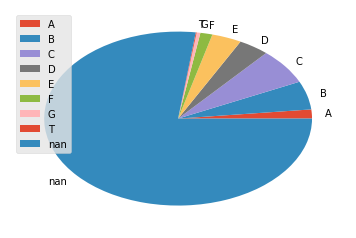

In [250]:
plt.pie(data = temp, x="PassengerId", labels=temp.index)
plt.legend()
plt.show()

선실번호가 없는 승객이 대다수, 그만 알아보자

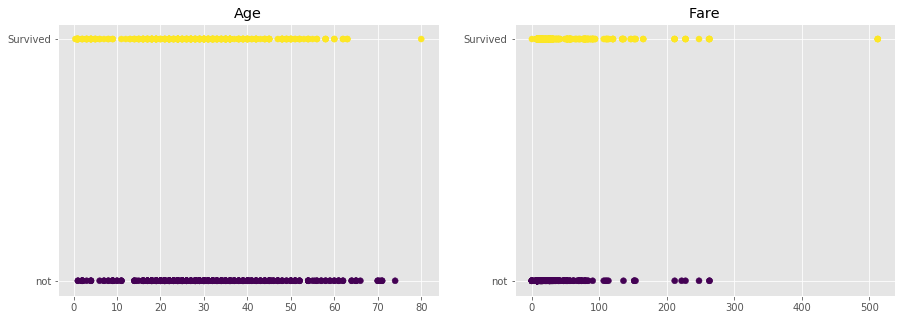

In [137]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Age")
plt.yticks(range(2), ('not', 'Survived'))
plt.scatter(train.Age, train.Survived, c=train.Survived)
plt.subplot(1, 2, 2)
plt.title("Fare")
plt.yticks(range(2), ('not', 'Survived'))
plt.scatter(train.Fare, train.Survived, c=train.Survived)
plt.show()

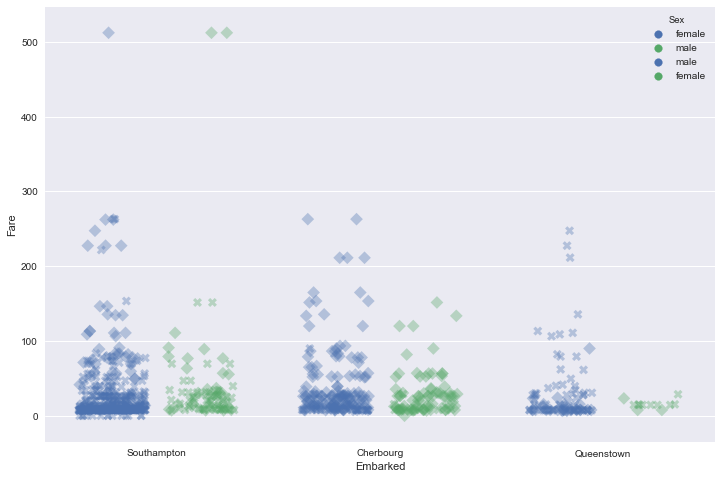

In [21]:
# hue정리 문제
plt.figure(figsize=(12, 8))
g1 = sns.stripplot(data = train[train["Survived"]==1], x = "Embarked", y = "Fare", 
                   jitter=0.3, hue="Sex", split=True, alpha=0.35, marker="D", size = 9, )


g2 = sns.stripplot(data = train[train["Survived"]==0], x = "Embarked", y = "Fare", 
                   jitter=0.3, hue="Sex", split=True, alpha=0.35, marker="X", size = 9)

g1.set_xticklabels(["Southampton", "Cherbourg", "Queenstown"])
plt.show()

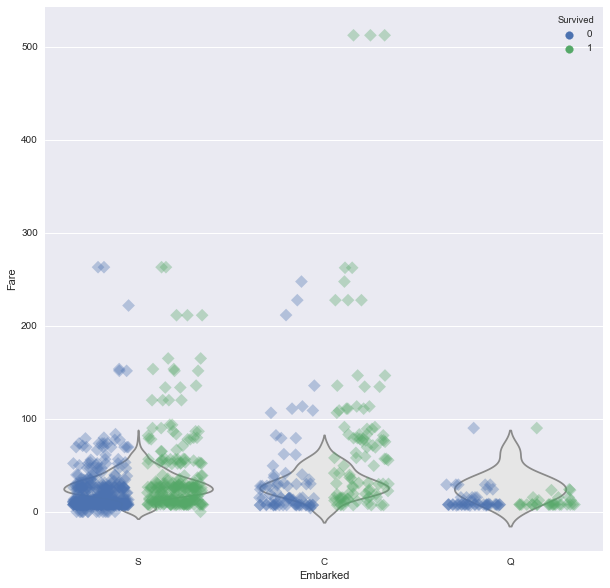

In [25]:
plt.figure(figsize=(10, 10))
sns.violinplot(data=train, x="Embarked", y="Age", inner=None, color=".9")
sns.stripplot(data=train, x="Embarked", y="Fare", 
              jitter=0.3, hue="Survived", split=True, alpha=0.35, marker="D", size=9)
plt.show()

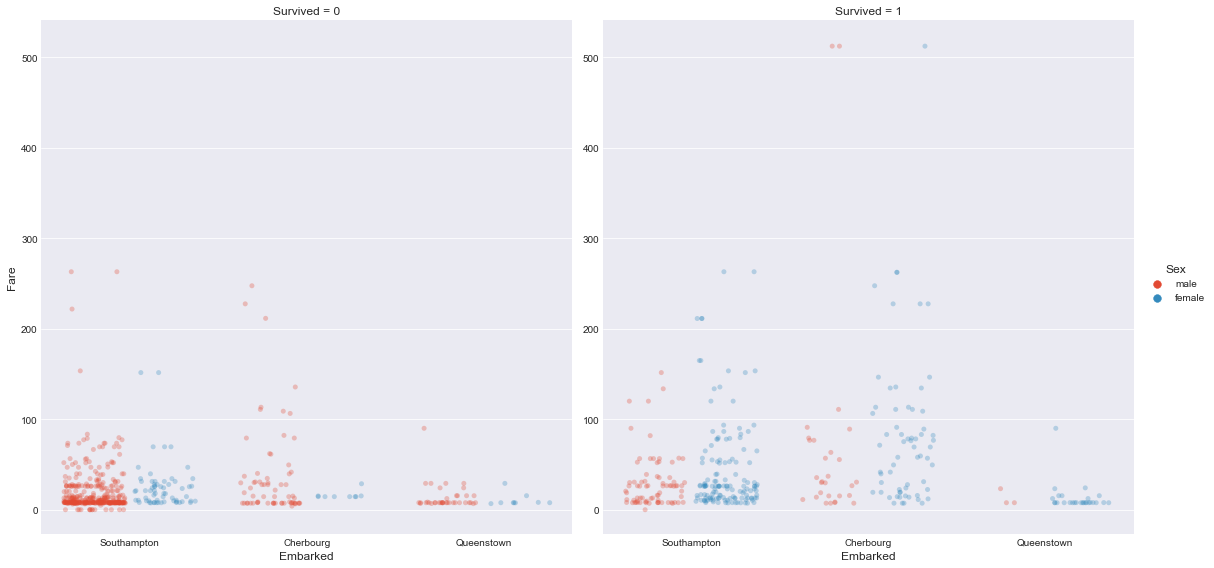

In [197]:
#sns.violinplot(data=train, x="Embarked", y="Age")
g = sns.factorplot(data=train, x="Embarked", y="Fare", hue="Sex", col="Survived", kind="strip", 
                   dodge=True, jitter=0.35, size=8, aspect=1, ci=None, marker="o", alpha=0.3)
g.set_xticklabels(["Southampton", "Cherbourg", "Queenstown"])

plt.show()

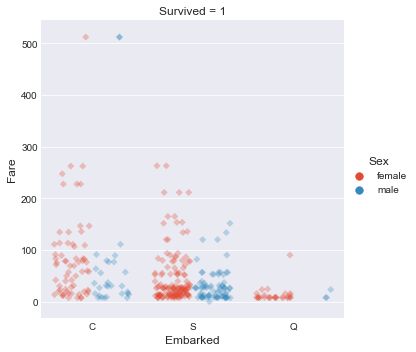

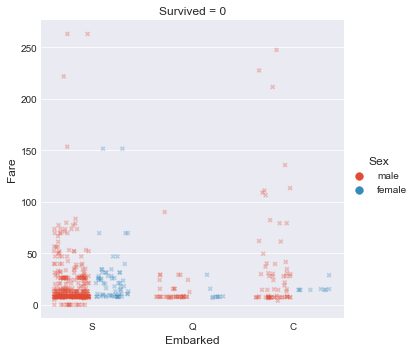

In [198]:
ax1 = sns.factorplot(data=train[train["Survived"]==1], x="Embarked", y="Fare", hue="Sex", col="Survived", kind="strip", 
                   dodge=True, jitter=0.35, size=5, aspect=1, ci=None, marker="D", alpha=0.3)

ax2 = sns.factorplot(data=train[train["Survived"]==0], x="Embarked", y="Fare", hue="Sex", col="Survived", kind="strip", 
                   dodge=True, jitter=0.35, size=5, aspect=1, ci=None, marker="X", alpha=0.3)
plt.show()

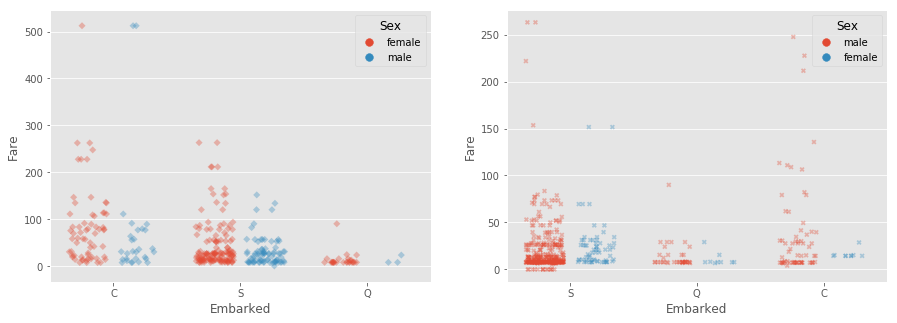

In [111]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.stripplot(data = train[train["Survived"]==1], x = "Embarked", y = "Fare", jitter=0.3, hue="Sex", dodge=True, alpha=0.35, marker="D")
plt.subplot(1, 2, 2)
sns.stripplot(data = train[train["Survived"]==0], x = "Embarked", y = "Fare", jitter=0.3, hue="Sex", dodge="a", alpha=0.35, marker="X")
plt.show()

In [111]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
